In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;"><div style="font-size:150%; color:#FEE100"><b>Unmasking Fraud: Insights from the AntiFraud Centre Dataset</b></div><div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div></div>

## Table of Contents
1. [Introduction](#Introduction)
2. [Data Loading](#Data-Loading)
3. [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
5. [Feature Engineering](#Feature-Engineering)
6. [Model Building and Evaluation](#Model-Building-and-Evaluation)
7. [Discussion and Future Work](#Discussion-and-Future-Work)

## Introduction
Fraud and cybercrime are pervasive issues that affect individuals and organizations worldwide. The AntiFraud Centre Dataset provides a unique opportunity to delve into the patterns and characteristics of these crimes. By analyzing this dataset, we aim to uncover insights that could help in predicting and preventing fraudulent activities. If you find this notebook useful, please consider upvoting it.

## Data Loading
Let's begin by loading the dataset and taking a preliminary look at its structure.

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# Load the dataset
file_path = '/content/drive/MyDrive/CC /AntiFraud Centre Dataset.csv'
df = pd.read_csv(file_path, delimiter=',', encoding='ascii')

# Display the first few rows of the dataframe
df.head()

OSError: 'seaborn-darkgrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

## Data Cleaning and Preprocessing
Before diving into analysis, it's crucial to clean and preprocess the data. This includes handling missing values, converting data types, and removing duplicates.

In [ ]:
# Check for missing values
df.isnull().sum()

Numro d'identification / Number ID                          0
Date Received / Date reue                                   0
Complaint Received Type                                     0
Type de plainte reue                                        0
Country                                                     0
Pays                                                        0
Province/State                                              0
Province/tat                                                0
Fraud and Cybercrime Thematic Categories                    0
Catgories thmatiques sur la fraude et la cybercriminalit    0
Solicitation Method                                         0
Mthode de sollicitation                                     0
Gender                                                      0
Genre                                                       0
Language of Correspondence                                  0
Langue de correspondance                                    0
Victim A

In [ ]:
# Convert 'Date Received / Date reue' to datetime
df['Date Received / Date reue'] = pd.to_datetime(df['Date Received / Date reue'], errors='coerce')

# Drop duplicates
df.drop_duplicates(inplace=True)

# Display the data types
df.dtypes

Numro d'identification / Number ID                                   int64
Date Received / Date reue                                   datetime64[ns]
Complaint Received Type                                             object
Type de plainte reue                                                object
Country                                                             object
Pays                                                                object
Province/State                                                      object
Province/tat                                                        object
Fraud and Cybercrime Thematic Categories                            object
Catgories thmatiques sur la fraude et la cybercriminalit            object
Solicitation Method                                                 object
Mthode de sollicitation                                             object
Gender                                                              object
Genre                    

## Exploratory Data Analysis
With a clean dataset, we can now explore the data to uncover patterns and insights.

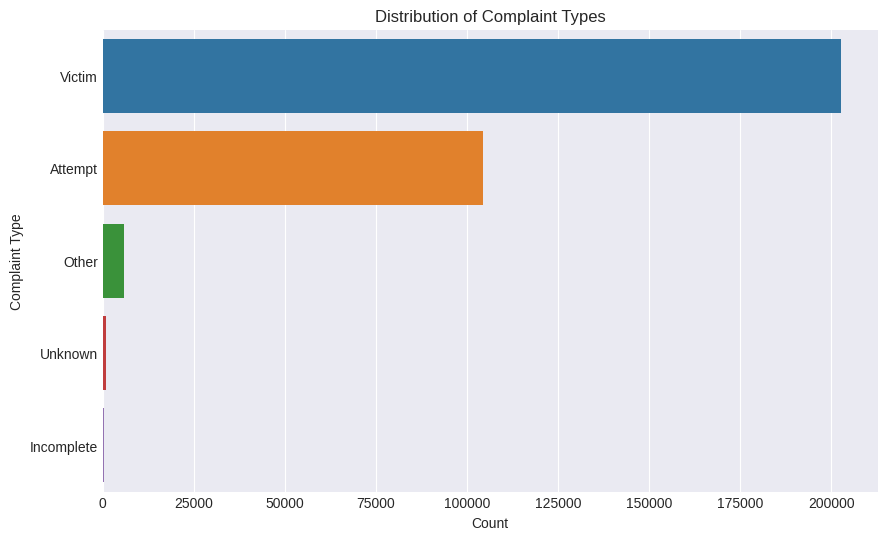

In [ ]:
# Visualize the distribution of complaint types
plt.figure(figsize=(10, 6))
sns.countplot(y='Complaint Type', data=df, order=df['Complaint Type'].value_counts().index)
plt.title('Distribution of Complaint Types')
plt.xlabel('Count')
plt.ylabel('Complaint Type')
plt.show()

In [ ]:
# Correlation heatmap for numeric columns
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

## Feature Engineering
Let's create some new features that might help in predicting fraudulent activities.

In [ ]:
# Extract year and month from 'Date Received / Date reue'
df['Year'] = df['Date Received / Date reue'].dt.year
df['Month'] = df['Date Received / Date reue'].dt.month

# Display the first few rows to verify
df[['Date Received / Date reue', 'Year', 'Month']].head()

,Date Received / Date reue,Year,Month
0,2021-01-02,2021,1
1,2021-01-02,2021,1
2,2021-01-02,2021,1
3,2021-01-02,2021,1
4,2021-01-02,2021,1


## Model Building and Evaluation
If the data suggests a prediction task, let's build a simple model to predict the likelihood of a complaint being a certain type.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Prepare the data for modeling
X = df[['Year', 'Month', 'Number of Victims / Nombre de victimes']]
y = df['Complaint Type']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the accuracy
accuracy

0.9771214421453823

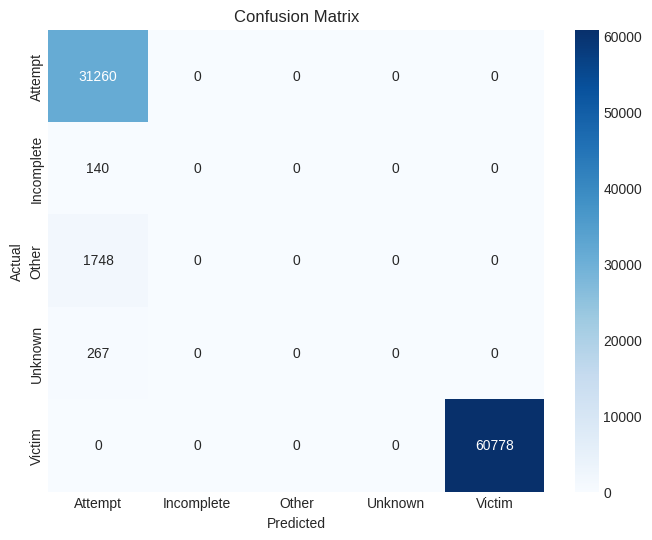

In [ ]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Discussion and Future Work
In this notebook, we explored the AntiFraud Centre Dataset to uncover insights into fraud and cybercrime complaints. We cleaned and preprocessed the data, performed exploratory data analysis, and built a simple predictive model. The Random Forest Classifier provided a baseline accuracy, but there is room for improvement.

Future work could involve:
- Exploring additional features and interactions
- Trying different machine learning algorithms
- Conducting hyperparameter tuning
- Investigating temporal patterns in fraud occurrences

If you found this notebook insightful, please consider upvoting it.